In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
train=pd.read_csv('train.csv')
valid=pd.read_csv('valid.csv')
test=pd.read_csv('test.csv')

In [3]:
X_train = train['PT08.S1(CO)'].values.reshape(-1,1)
y_train = train['CO(GT)']


X_valid = valid['PT08.S1(CO)'].values.reshape(-1,1)
y_valid = valid['CO(GT)']


X_test = test['PT08.S1(CO)'].values.reshape(-1,1)
y_test = test['CO(GT)']

In [4]:
degrees =[2, 3, 4, 5]
rmse_val ={}
rmse_train={}

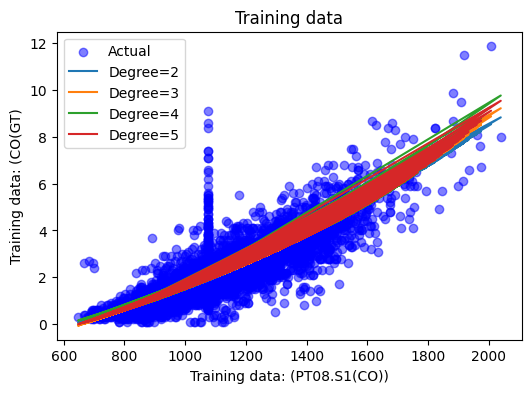

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color="Blue", alpha=0.5, label="Actual")

# X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    # X_test_poly = poly.transform(X_test)

    # X_range_poly = poly.transform(X_range)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)


    y_train_pred= model.predict(X_train_poly)
    y_valid_pred= model.predict(X_valid_poly)
    # y_test_pred= model.predict(X_test_poly)


    rmse_train[d] = sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_val[d] = sqrt(mean_squared_error(y_valid, y_valid_pred))

    plt.plot(X_train, y_train_pred, label=f"Degree={d}")
    # plt.plot(X_range, model.predict(X_range_poly), label=f"Degree ={d}")

plt.legend()
plt.xlabel("Training data: (PT08.S1(CO))")
plt.ylabel("Training data: (CO(GT)")
plt.title("Training data")
plt.show()

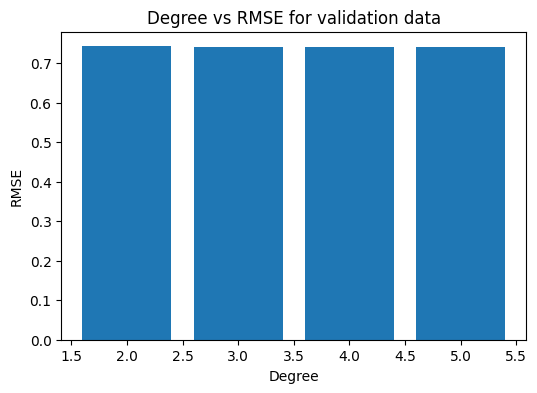

RMSE keys: dict_keys([2, 3, 4, 5]) and RMSE values: dict_values([0.7420426181948163, 0.7410896060604704, 0.7400199580230612, 0.7405646461301496])


In [26]:
plt.figure(figsize=(6,4))
plt.bar(rmse_val.keys(), rmse_val.values())
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("Degree vs RMSE for validation data")
plt.show()

print(f"RMSE keys: {rmse_val.keys()} and RMSE values: {rmse_val.values()}")

In [28]:
print(f"RMSE for training data: {rmse_train}")
print(f"RMSE for validation data: {rmse_val}")

RMSE for training data: {2: 0.7529136705201347, 3: 0.7525812636134244, 4: 0.7521114740601658, 5: 0.7523795060359266}
RMSE for validation data: {2: 0.7420426181948163, 3: 0.7410896060604704, 4: 0.7400199580230612, 5: 0.7405646461301496}


In [29]:
best_degree = 2
for i in degrees:
    if rmse_val[i] < rmse_val[best_degree]:
        best_degree = i
print(f"Best degree based on validation data: {best_degree}")

Best degree based on validation data: 4


In [32]:
poly_best = PolynomialFeatures(degree=best_degree)
X_train_poly_best = poly_best.fit_transform(X_train)

X_test_poly_best = poly_best.transform(X_test)

model_best = LinearRegression()
model_best.fit(X_train_poly_best, y_train)

y_test_pred_best= model_best.predict(X_test_poly_best)

rmse_test_best = sqrt(mean_squared_error(y_test, y_test_pred_best))

print(f"RMSE for best degree: {best_degree} for test data is {rmse_test_best}")

RMSE for best degree: 4 for test data is 0.7882581926905462


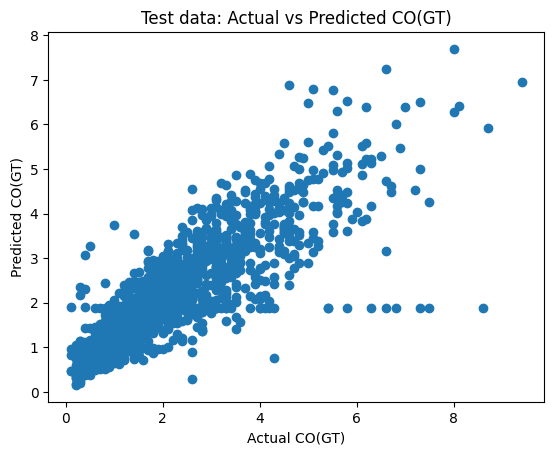

In [34]:
plt.scatter(y_test, y_test_pred_best)
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Test data: Actual vs Predicted CO(GT)")

plt.show()